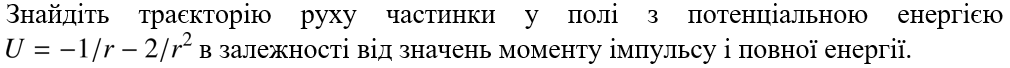

$E = \frac{m \dot{r}^2}{2} + \frac{m r^2 \dot{\varphi}^2}{2} + U(r) = 0$

Обобщённый импульс по $\varphi$ он же момент количества движения

$P_{\varphi} = M = m r^2 \dot{\varphi}$

откуда

$\dot{\varphi} =\frac{M}{ m r^2} $


$U_{eff}(r) = \frac{M^2}{2 m r^2} + U(r)$

$E = \frac{m \dot{r}^2}{2} + \frac{M^2}{2 m r^2} + U(r) = 0$

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
t = var("t")
R = var("r")
assume(R, "real")
assume(R>0)

r = function("r")(t)
M = var("M")
assume(M, "real")

E = var("E")

m = var("m")
assume(m, "real")
assume(m>0)

phi = var("phi")
assume(phi, "real")

U = -1/r - 2/r^2

u_eff = function("U_eff")(R)
disp(u_eff)

U_eff = M^2/(2*m*r^2) + U
disp(U_eff)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [133]:
values = [
    E == -0.2,
    M == 5,
    m == 1
]

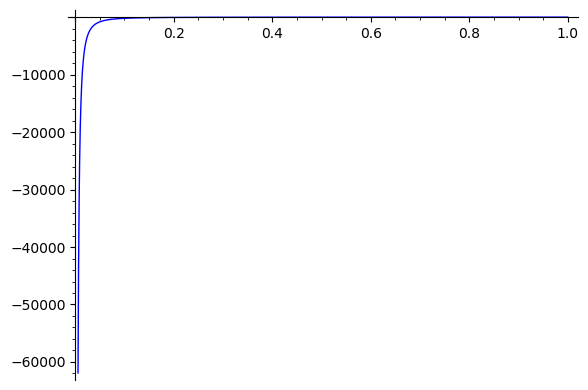

In [134]:
plot(U.subs(r == R), R, 0, 1)

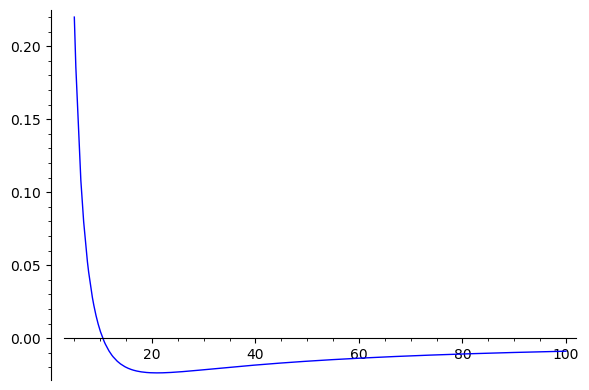

In [137]:
plot(U_eff.subs(r == R).subs(values), R, 5, 100)

In [138]:
eq_E = E == m * r.diff(t)^2/2 + U_eff
disp(eq_E)

<IPython.core.display.Math object>

In [139]:
eq_Eu = E == m * r.diff(t)^2/2 + u_eff
disp(eq_Eu)

<IPython.core.display.Math object>

In [140]:
sol_ru_diff_t = solve(eq_Eu, r.diff(t))
disp(sol_ru_diff_t)

<IPython.core.display.Math object>

In [141]:
sol_r_diff_t = solve(eq_E, r.diff(t))
disp(sol_r_diff_t)

<IPython.core.display.Math object>

In [142]:
dru_dt = sol_ru_diff_t[1].rhs()
displ("\\frac{dr}{dt} =" + latex(dru_dt))

<IPython.core.display.Math object>

условие $E > U_{eff}(r)$ является необходимым для получения действительных решений задачи поиска максимального и минимального радиуса

In [143]:
sol_neq_real = solve(E - U_eff.subs(r == R) > 0, R)
disp(sol_neq_real)

<IPython.core.display.Math object>

In [144]:
disp(sol_neq_real[0][1].subs(values))

<IPython.core.display.Math object>

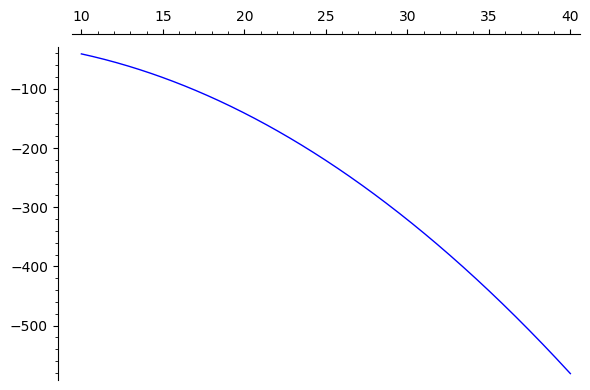

In [145]:
plot(sol_neq_real[0][1].lhs().subs(values), R, 10, 40)

In [146]:
sol_real = solve(E - U_eff.subs(r == R) == 0, R)
disp(sol_real)

<IPython.core.display.Math object>

In [147]:
disp(sol_real[0].subs(values))
sol_real[0].rhs().subs(values).n()

IndexError: list index out of range

In [148]:
disp(sol_real[1].subs(values))
sol_real[1].rhs().subs(values).n()

IndexError: list index out of range

In [149]:
dr_dt = sol_r_diff_t[1].rhs()
displ("\\frac{dr}{dt} =" + latex(dr_dt))

<IPython.core.display.Math object>

точки перигея и эпогея определяются 

$\frac{dr}{d{t}} = 0$

In [150]:
sol_r_min_max = solve(dr_dt == 0, r)
disp(sol_r_min_max)

<IPython.core.display.Math object>

In [151]:
disp(sol_r_min_max[0].subs(values))
sol_r_min_max[0].rhs().subs(values).n()

<IPython.core.display.Math object>

2.50000000000000 + 6.80073525436772*I

In [152]:
disp(sol_r_min_max[1].subs(values))
sol_r_min_max[1].rhs().subs(values).n()

<IPython.core.display.Math object>

2.50000000000000 - 6.80073525436772*I

In [153]:
(dt_dr) = (1/dr_dt)
displ("dt = " + latex(dt_dr) + "\\, dr")

<IPython.core.display.Math object>

поскольку

$\dot{\varphi} =\frac{M}{ m r^2} $


$d{\varphi} =\frac{M}{ m r^2}\,dt$

In [154]:
dphi_dr = M/(m*r^2) * dt_dr
displ("d{\\varphi} = " +latex(dphi_dr) + "\\, dr")

<IPython.core.display.Math object>

In [155]:
dphi_dR = dphi_dr.subs(r == R)
displ("d{\\varphi} = " +latex(dphi_dR) + "\\, dr")

<IPython.core.display.Math object>

траектория

$\varphi (r) = \int d{\varphi}$

In [156]:
(4*m-M^2>0).subs(values)

-21 > 0

In [157]:
(m+2*E*M^2>0).subs(values)

-9.00000000000000 > 0

In [158]:
(8*E*m-m-2*E*M^2>0).subs(values)

7.40000000000000 > 0

In [159]:
assume(M>0)
#assume(m+2*E*M^2>0) # for Kepler U = -1/r

assume(4*m-M^2<0) # for Kepler-like U = -1/r - 2/r^2
assume(8*E*m-m-2*E*M^2>0)
phi_R = dphi_dR.integrate(R)
displ("\\varphi = " +latex(phi_R) + "")

<IPython.core.display.Math object>

In [160]:
phi_diff_R = phi_R.diff(R)
disp(phi_diff_R)

<IPython.core.display.Math object>

In [161]:
disp((phi_diff_R - dphi_dR).expand())

<IPython.core.display.Math object>

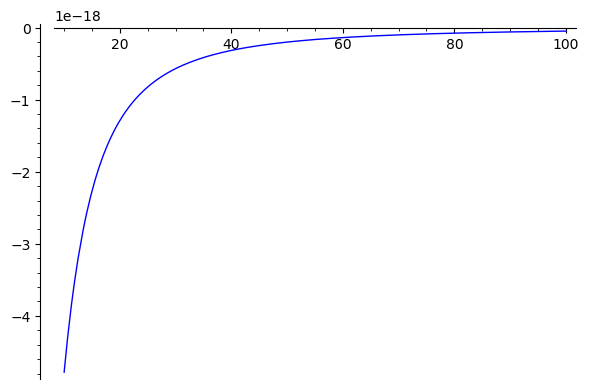

In [166]:
plot((phi_diff_R - dphi_dR).expand().subs(values).real(), (R, 10, 100))

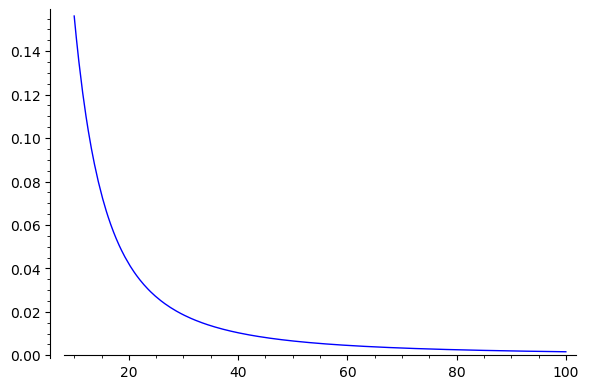

In [167]:
plot((phi_diff_R - dphi_dR).expand().subs(values).imag(), (R, 10, 100))

In [32]:
sin_minus_phi = phi_R.operands()[0].operands()[0]
disp(sin_minus_phi)

<IPython.core.display.Math object>

In [33]:
s = var("s")
sol_R_sin_minus_phi = solve(sin_minus_phi == s, R)
disp(sol_R_sin_minus_phi)

<IPython.core.display.Math object>

In [ ]:
sol_R_phi = sol_R_sin_minus_phi[0].subs(s == -sin(phi))
disp(sol_R_phi)

In [ ]:
polar_plot(sol_R_phi.rhs().subs(values), (phi, 0, 2*pi), color=hue(0.5), thickness=4)

In [ ]:
plot(sol_R_phi.rhs().subs(values), (phi, 0, 4*pi), color=hue(0.5), thickness=4)